In [399]:
from google.colab import files
uploaded = files.upload()

Saving Obesity Dataset.csv to Obesity Dataset (7).csv


In [400]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [401]:
df = pd.read_csv('Obesity Dataset.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [402]:
## Drop duplicate rows
df.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [403]:
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [404]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [405]:
## Rename abstract column names to meaningful ones
df.columns = ['Gender', 'Age', 'Height (cms)', 'Weight (kgs)', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Daily water intake', 'Monitor calories consumption', 'Physical activity frequency', 'Time using technology devices',
       'Frequency of alcohol consumption', 'Transportation used', 'Obesity']

df

,Gender,Age,Height (cms),Weight (kgs),Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Daily water intake,Monitor calories consumption,Physical activity frequency,Time using technology devices,Frequency of alcohol consumption,Transportation used,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [406]:
## Remove underscores fro Obesity and Transportation columns
# Convert Height from meters to cms and round off to 1 digit after decimal
# Round off Weight and Age to one digit after decimal
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))
df['Transportation used'] = df['Transportation used'].apply(lambda x: x.replace('_', ' '))
df['Height (cms)'] = df['Height (cms)']*100
df['Height (cms)'] = df['Height (cms)'].round(1)
df['Weight (kgs)'] = df['Weight (kgs)'].round(1)
df['Age'] = df['Age'].round(1)
df

,Gender,Age,Height (cms),Weight (kgs),Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Daily water intake,Monitor calories consumption,Physical activity frequency,Time using technology devices,Frequency of alcohol consumption,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [407]:
# Rounding off some of the numeric columns

for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Daily water intake', 'Physical activity frequency', 'Time using technology devices']:
    df[x] = df[x].apply(round)
    value = np.array(df[x])
    print(x,':', 'min:', np.min(value), 'max:', np.max(value), df[x].dtype)
    print(df[x].unique())

Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Daily water intake : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [408]:
df_original = df.copy()

In [225]:
# Replace numeric values with meaningful text
#mapping0 = {'Never':1, 'Sometimes':2, 'Always':3}
#mapping1 = {1: '1', 2:'2' , 3: '3', 4: '3+'}
#mapping2 = {1: 'Less than a liter', 2:'Between 1 and 2 L', 3:'More than 2 L'}
#mapping3 = {0: 'I do not have', 1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
#mapping4 = {0: '0–2 hours', 1: '3–5 hours', 2: 'More than 5 hours'}

#df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(mapping0)
#df['Number of main meals'] = df['Number of main meals'].replace(mapping1)
#df['Daily water intake'] = df['Daily water intake'].replace(mapping2)
#df['Physical activity frequency'] = df['Physical activity frequency'].replace(mapping3)
#df['Time using technology devices'] = df['Time using technology devices'].replace(mapping4)

In [409]:
df

,Gender,Age,Height (cms),Weight (kgs),Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Daily water intake,Monitor calories consumption,Physical activity frequency,Time using technology devices,Frequency of alcohol consumption,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public Transportation,Obesity Type III


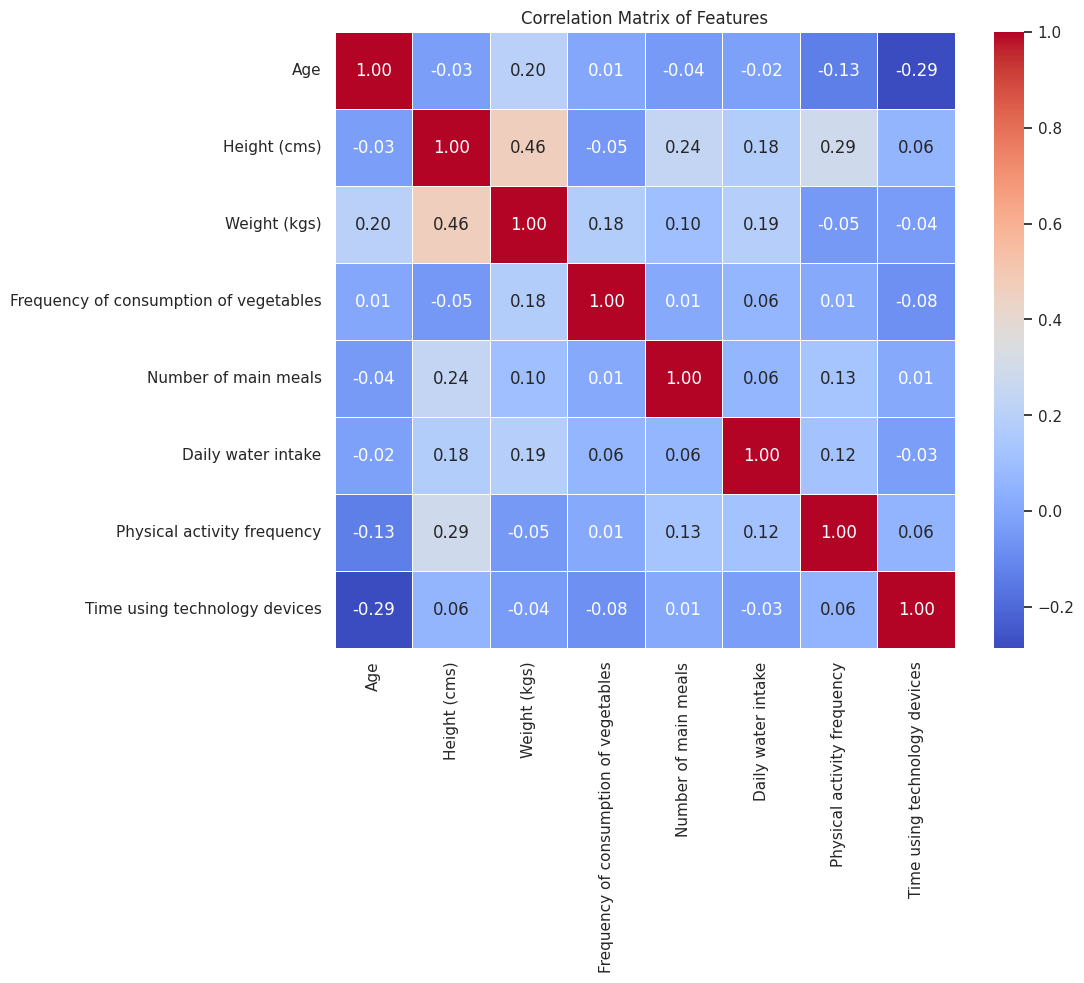

In [410]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Add title and display the plot
plt.title('Correlation Matrix of Features')
plt.show()

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height (cms)                               2111 non-null   float64
 3   Weight (kgs)                               2111 non-null   float64
 4   Family History with Overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   int64  
 7   Number of main meals                       2111 non-null   int64  
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Daily water intake      

<ipython-input-374-4f3ddd852b24>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Height (cms)', data=df, palette={'Male': 'lightblue', 'Female': 'salmon'})
<ipython-input-374-4f3ddd852b24>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Weight (kgs)', data=df, palette={'Male': 'lightblue', 'Female': 'salmon'})


<Axes: xlabel='Gender', ylabel='Weight (kgs)'>

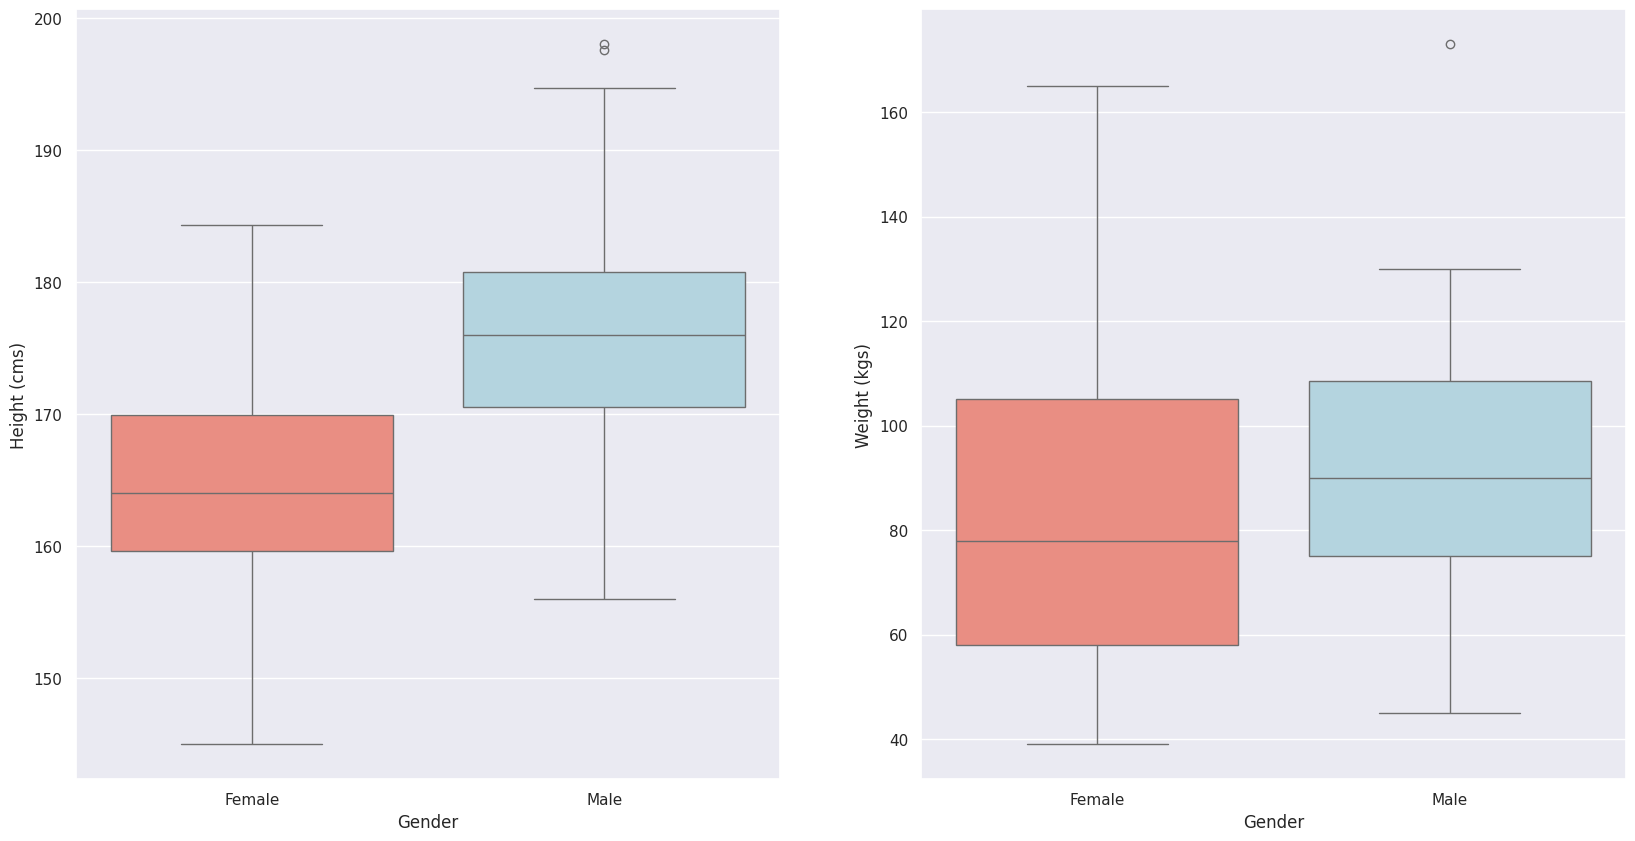

In [374]:
sns.set()
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height (cms)', data=df, palette={'Male': 'lightblue', 'Female': 'salmon'})
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight (kgs)', data=df, palette={'Male': 'lightblue', 'Female': 'salmon'})

In [375]:
c = Counter(df['Obesity'])
print(c)

Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})


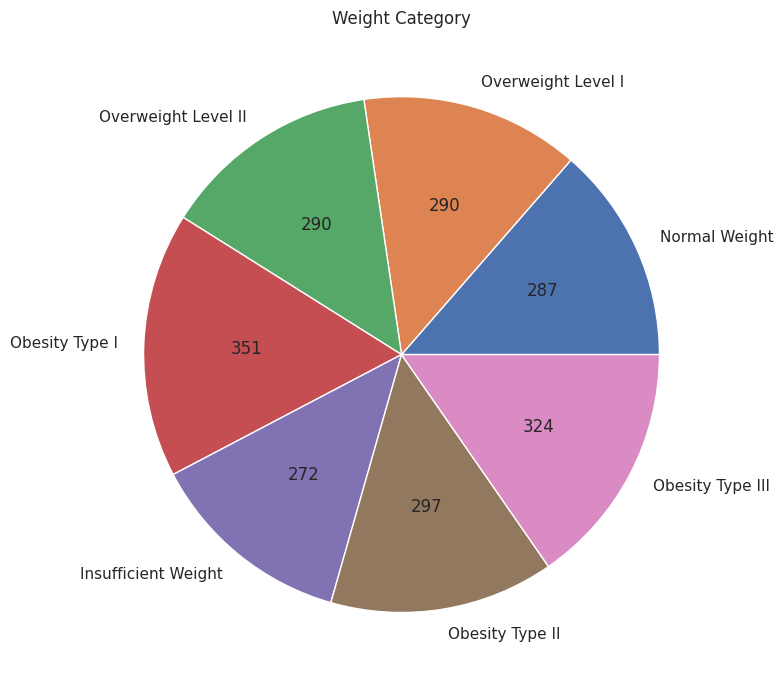

In [376]:
values = [float(c[v]) for v in c]
labels = [str(k) for k in c]

# Custom function to show raw values
def show_values(pct, all_vals):
    total = sum(all_vals)
    absolute = int(round(pct/100 * total))
    return f'{absolute}'

# Plot
fig = plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct=lambda pct: show_values(pct, values))
plt.title('Weight Category')
plt.tight_layout()
plt.show()

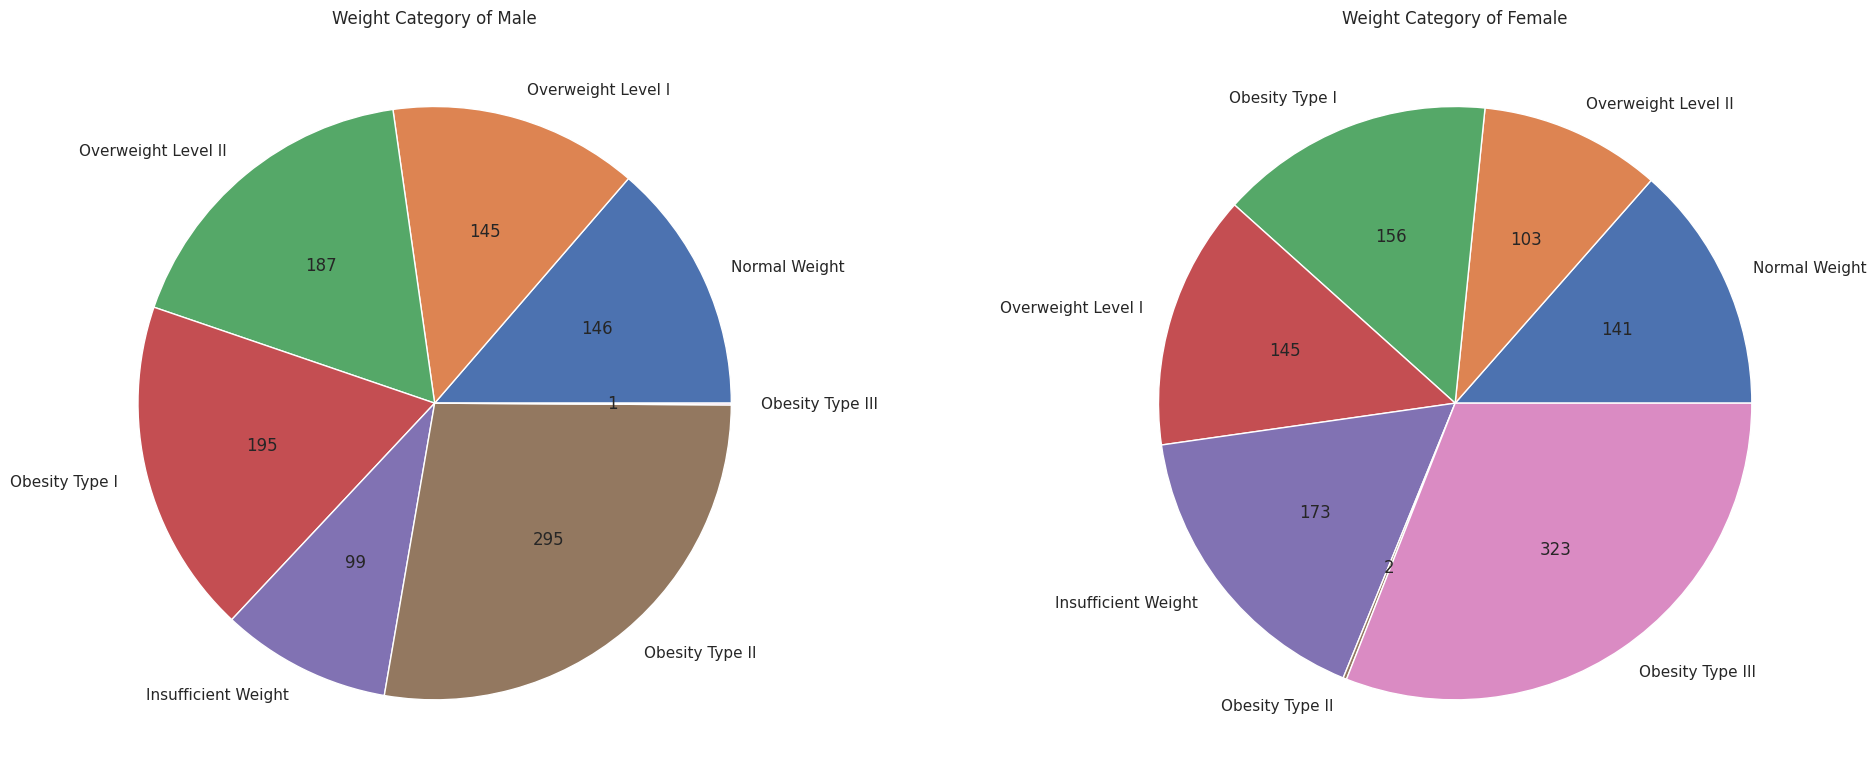

In [377]:
# Split data by gender
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Count obesity categories for each gender
c_m = Counter(df_male['Obesity'])
c_f = Counter(df_female['Obesity'])

# Prepare data
values_m = [float(c_m[v]) for v in c_m]
labels_m = [str(k) for k in c_m]

values_f = [float(c_f[v]) for v in c_f]
labels_f = [str(k) for k in c_f]

# Function to show raw counts
def show_values(pct, all_vals):
    total = sum(all_vals)
    absolute = int(round(pct/100 * total))
    return f'{absolute}'

# Plotting
fig = plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.pie(values_m, labels=labels_m, autopct=lambda pct: show_values(pct, values_m))
plt.title('Weight Category of Male')

plt.subplot(1, 2, 2)
plt.pie(values_f, labels=labels_f, autopct=lambda pct: show_values(pct, values_f))
plt.title('Weight Category of Female')

plt.tight_layout()
plt.show()

Family History with Overweight ['yes', 'no'] [1726, 385]
Frequent consumption of high caloric food ['yes', 'no'] [1866, 245]
Frequency of consumption of vegetables [2, 3, 1] [1013, 996, 102]
Number of main meals [3, 1, 2, 4] [1470, 316, 176, 149]
Consumption of food between meals ['Sometimes', 'Frequently', 'Always', 'no'] [1765, 242, 53, 51]
Smoke ['no', 'yes'] [2067, 44]
Daily water intake [2, 3, 1] [1110, 516, 485]
Monitor calories consumption ['no', 'yes'] [2015, 96]
Physical activity frequency [1, 0, 2, 3] [776, 720, 496, 119]
Time using technology devices [0, 1, 2] [952, 915, 244]
Frequency of alcohol consumption ['Sometimes', 'no', 'Frequently', 'Always'] [1401, 639, 70, 1]
Transportation used ['Public Transportation', 'Automobile', 'Walking', 'Motorbike', 'Bike'] [1580, 457, 56, 11, 7]


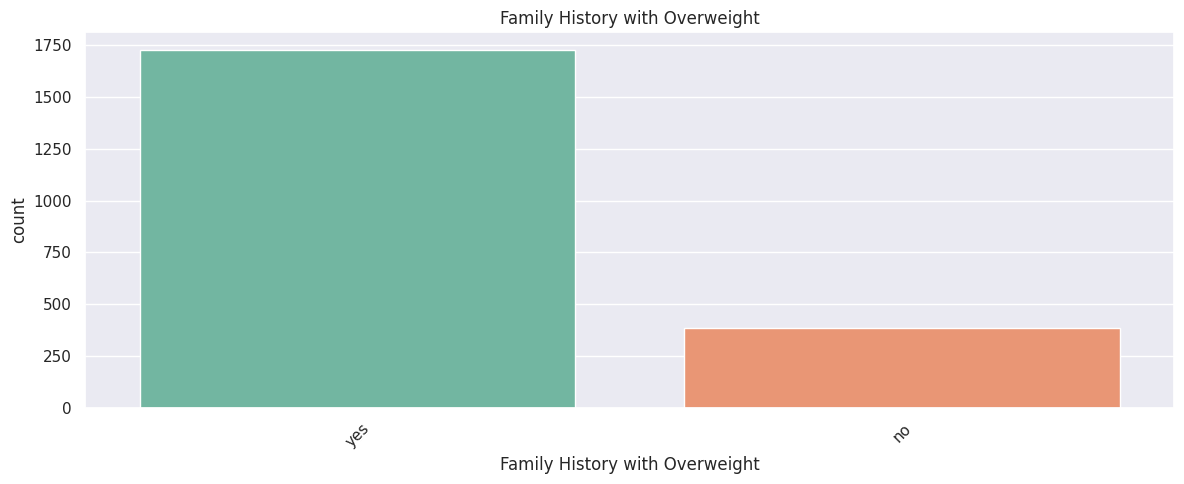

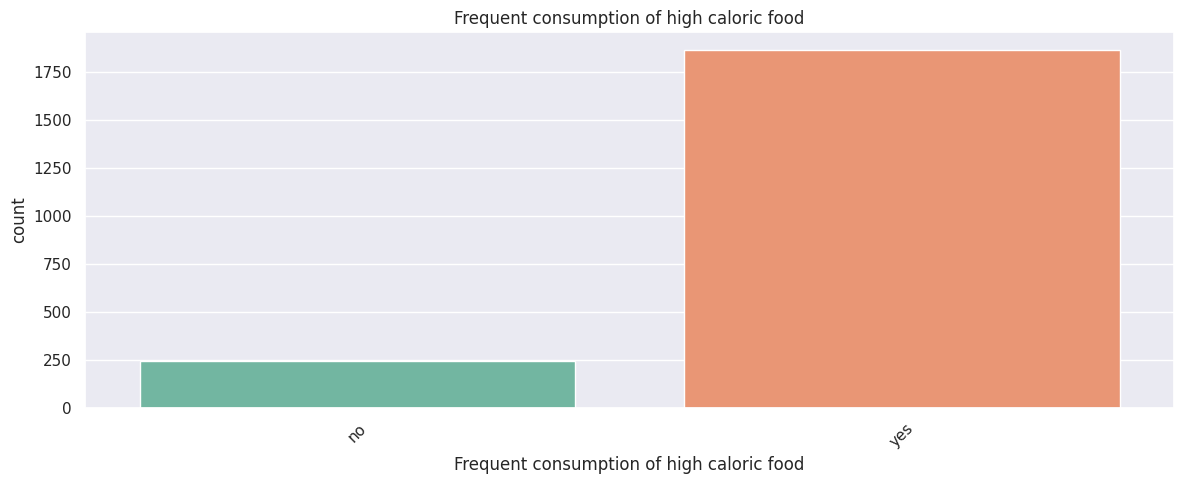

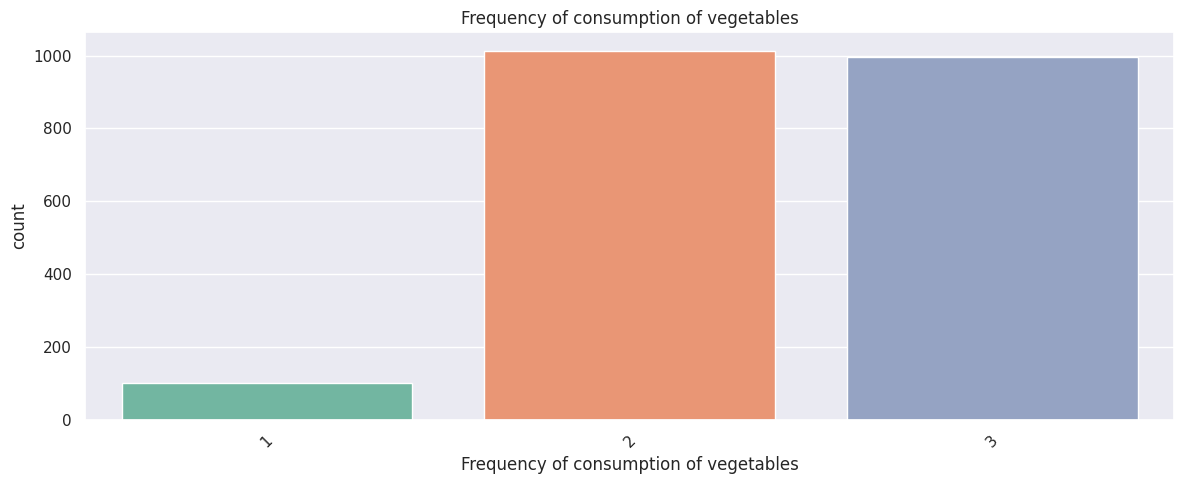

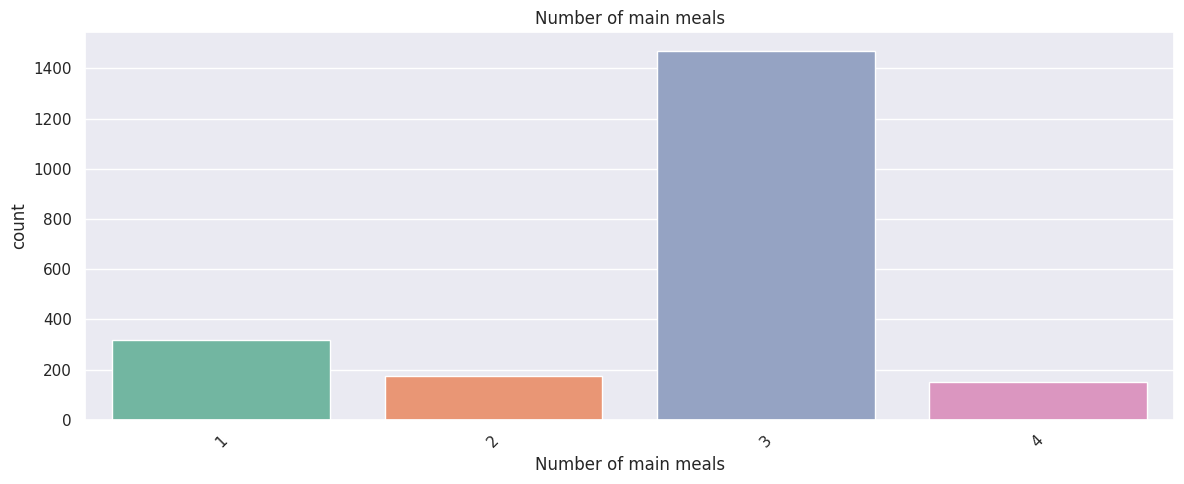

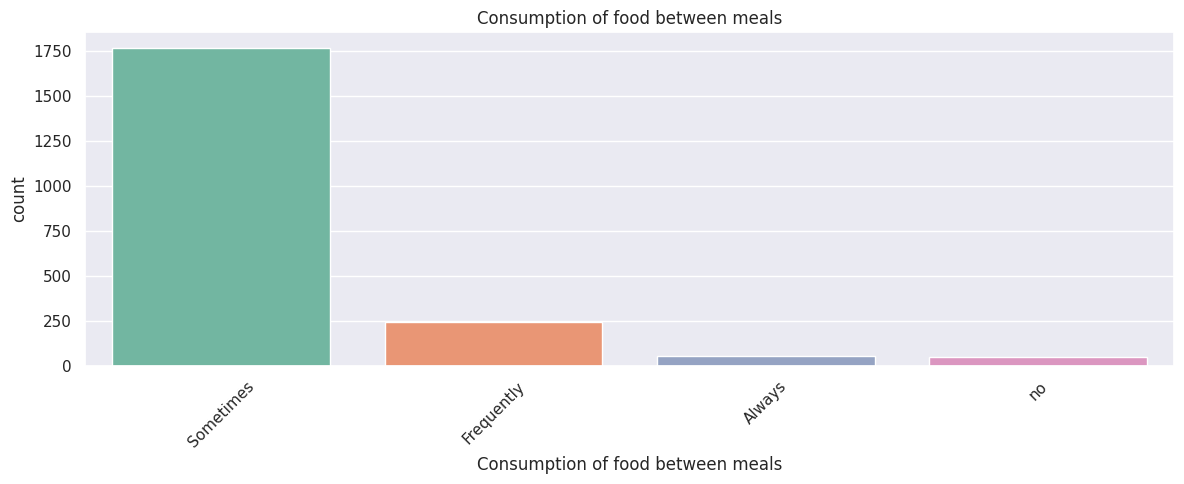

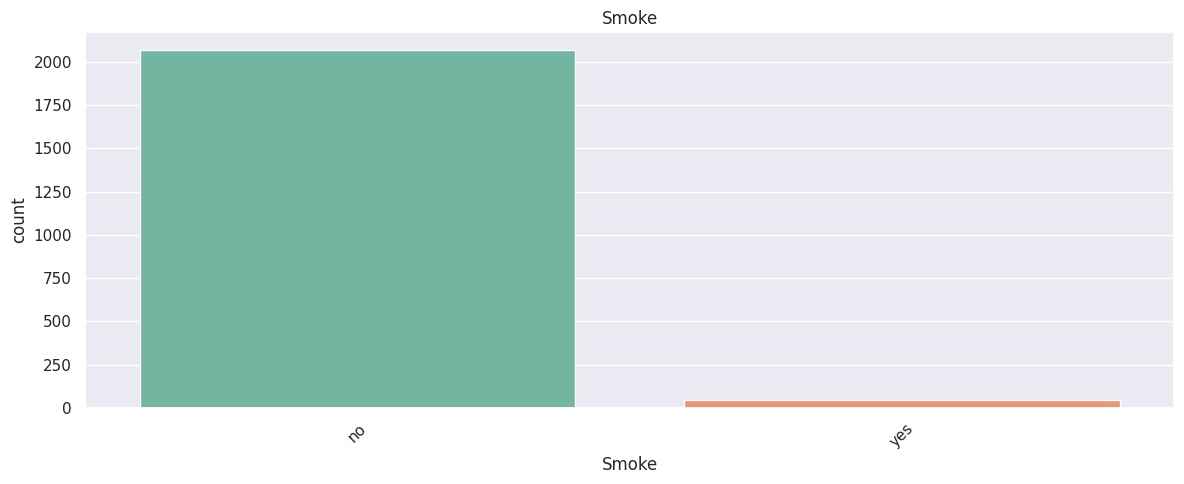

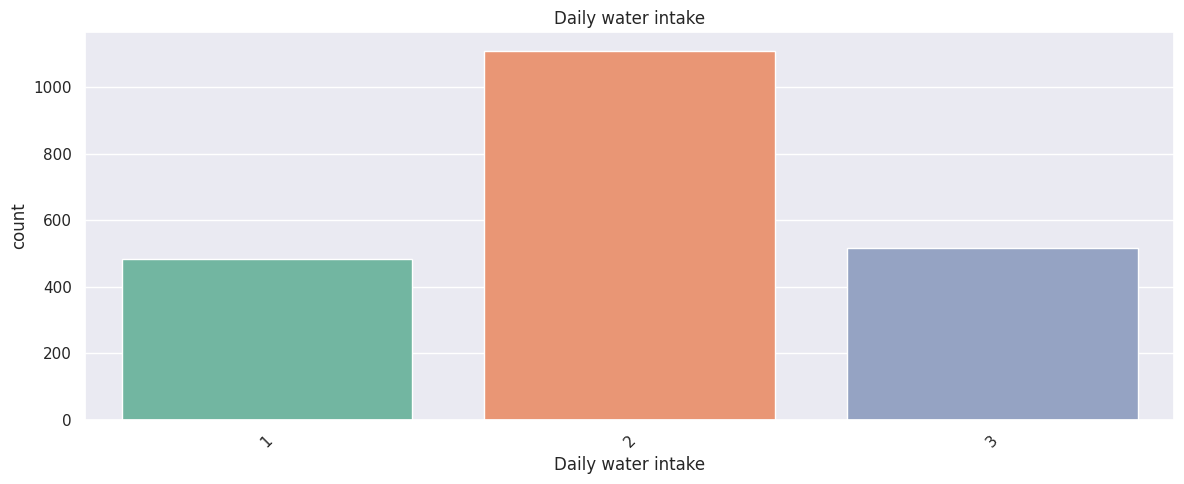

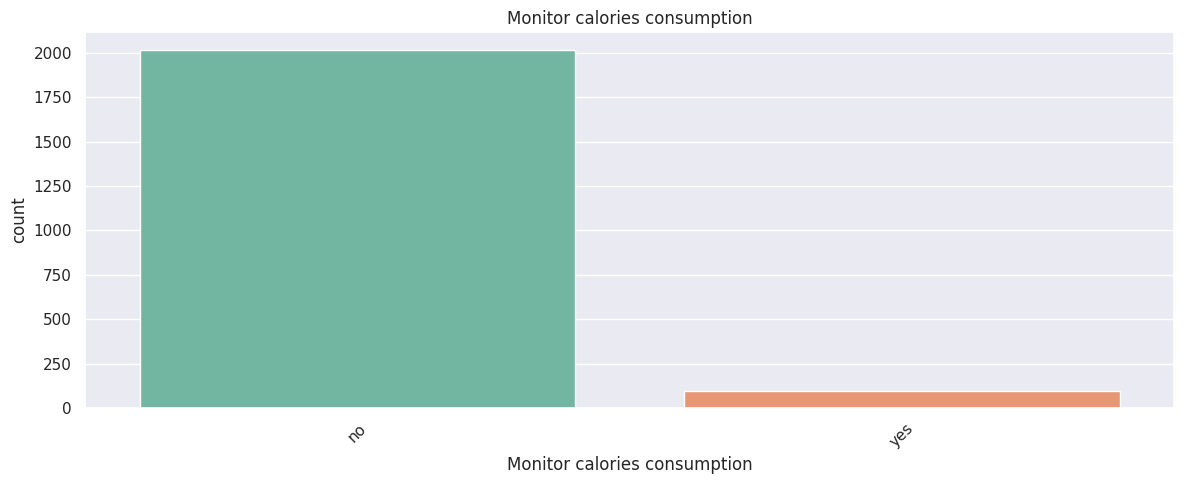

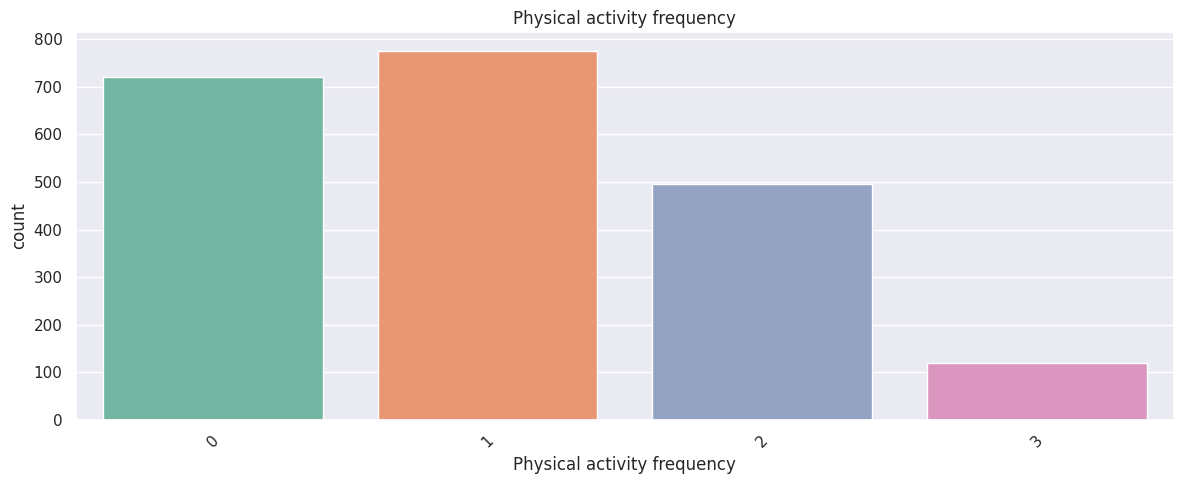

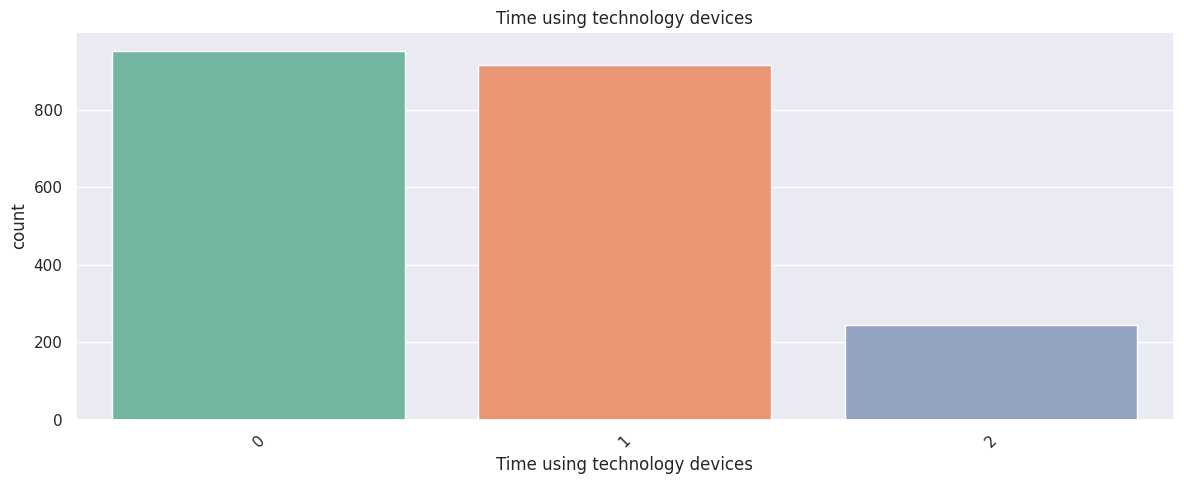

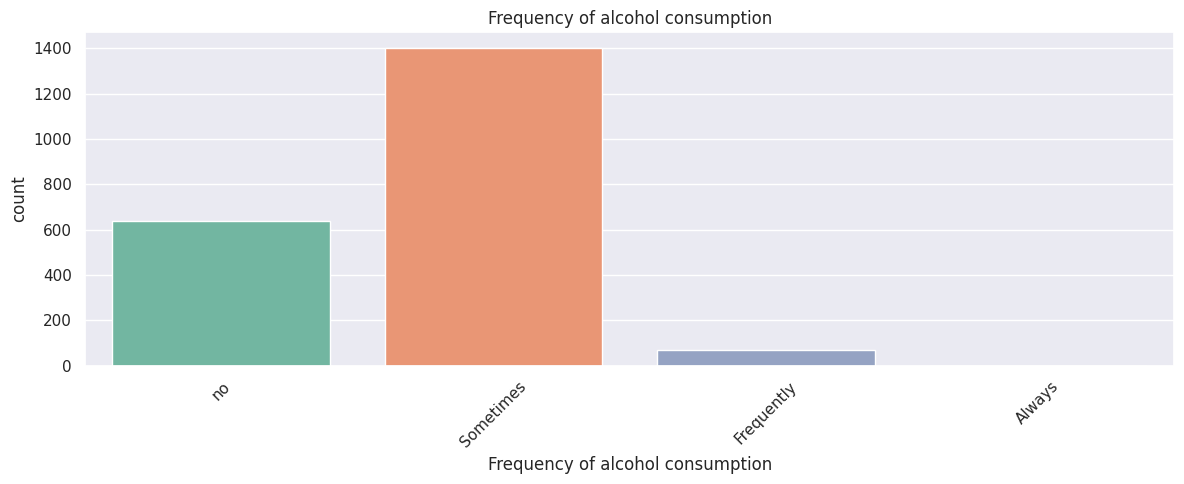

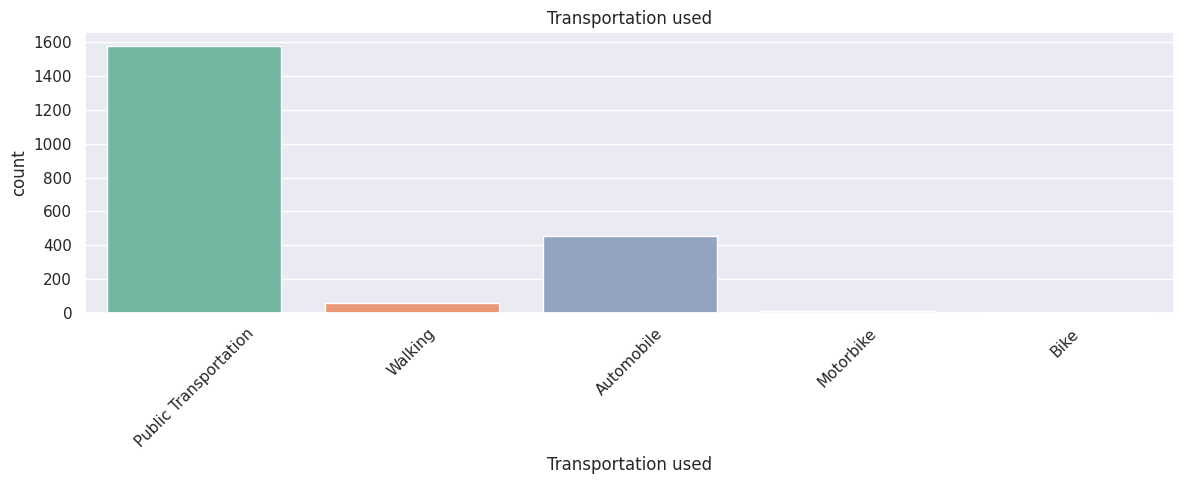

In [378]:
for a in df.columns[4:-1]:
    plt.figure(figsize=(12, 5))

    # Plot with category values as hue
    sns.countplot(data=df, x=a, hue=a, dodge=False, palette='Set2', legend=False)

    plt.title(a)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Print counts
    data = df[a].value_counts()
    values = data.index.to_list()
    counts = data.to_list()
    print(a, values, counts)

In [412]:
df.head()

,Gender,Age,Height (cms),Weight (kgs),Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Daily water intake,Monitor calories consumption,Physical activity frequency,Time using technology devices,Frequency of alcohol consumption,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II


In [380]:
df.shape

(2111, 17)

Since classifier cannot operate with label data directly, One Hot Encoder and Label Encoding will be used to assign numeric values to each category

In [413]:
# identity categorical variables (data type would be 'object')
cat = df.dtypes == object

print(cat)

# When dtype == object is 'true'
print(cat[cat])
cat_labels = cat[cat].index
print('Categorical variables:', cat_labels)

# When dtype == object is 'false'
false = cat[~cat]
non_cat = false.index
print('Non Categorical variables:', non_cat)

Gender                                        True
Age                                          False
Height (cms)                                 False
Weight (kgs)                                 False
Family History with Overweight                True
Frequent consumption of high caloric food     True
Frequency of consumption of vegetables       False
Number of main meals                         False
Consumption of food between meals             True
Smoke                                         True
Daily water intake                           False
Monitor calories consumption                  True
Physical activity frequency                  False
Time using technology devices                False
Frequency of alcohol consumption              True
Transportation used                           True
Obesity                                       True
dtype: bool
Gender                                       True
Family History with Overweight               True
Frequent consumption 

In [414]:
# identify categorical variables with more than 2 values/answers
col = [x for x in cat_labels]
multiple = [df[x].unique() for x in cat_labels]

multi_col = {col: values for col, values in zip(col, multiple) if len(values)>2}
print(multi_col)
print('\n')
print('Categorical variables with more than 2 values/answers:', multi_col.keys())

{'Consumption of food between meals': array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object), 'Frequency of alcohol consumption': array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object), 'Transportation used': array(['Public Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object), 'Obesity': array(['Normal Weight', 'Overweight Level I', 'Overweight Level II',
       'Obesity Type I', 'Insufficient Weight', 'Obesity Type II',
       'Obesity Type III'], dtype=object)}


Categorical variables with more than 2 values/answers: dict_keys(['Consumption of food between meals', 'Frequency of alcohol consumption', 'Transportation used', 'Obesity'])


In [415]:
df.columns

def col_no(x):
    d = {}
    d[df.columns[x]] = x
    return(d)

print([col_no(x) for x in range(0, len(df.columns))])

[{'Gender': 0}, {'Age': 1}, {'Height (cms)': 2}, {'Weight (kgs)': 3}, {'Family History with Overweight': 4}, {'Frequent consumption of high caloric food': 5}, {'Frequency of consumption of vegetables': 6}, {'Number of main meals': 7}, {'Consumption of food between meals': 8}, {'Smoke': 9}, {'Daily water intake': 10}, {'Monitor calories consumption': 11}, {'Physical activity frequency': 12}, {'Time using technology devices': 13}, {'Frequency of alcohol consumption': 14}, {'Transportation used': 15}, {'Obesity': 16}]


In [416]:
X = df.drop('Obesity', axis=1)
y = df['Obesity']

In [417]:
le = LabelEncoder()
y = le.fit_transform(y)
y.shape
y

array([1, 1, 1, ..., 4, 4, 4])

In [418]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
# Features only for imputation (numerical)
Imputer_features = ['Age', 'Height (cms)', 'Weight (kgs)']
Null_Imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Ordinal categorical features
Ordi_features = ['Consumption of food between meals', 'Frequency of alcohol consumption']
Ordi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Ordi', OrdinalEncoder())
])

# Non-ordinal categorical features — Make sure there's NO overlap with Ordi_features
NonO_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
                 'Smoke', 'Monitor calories consumption', 'Transportation used']
NonO_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Non-O', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer combining all preprocessing
Preprocessor = ColumnTransformer(transformers=[
    ('imputer', Null_Imputer, Imputer_features),
    ('Ordinal', Ordi_transformer, Ordi_features),
    ('Non-Ordinal', NonO_transformer, NonO_features)
], remainder='passthrough')

# Final pipeline with only preprocessing
clf = Pipeline(steps=[('preprocessor', Preprocessor)])

In [328]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imputer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Age', 'Height (cms)',
                                                   'Weight (kgs)']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Ordi',
                                                                   OrdinalEncoder())]),
                                                  ['Consumption of food '
                                                   'between meals',
                                                   'Frequency of alcohol '
                                                   'consumption']),
                                                 ('Non-Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Non-O',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Family History with '
                                                   'Overweight',
                                                   'Frequent consumption of '
                                                   'high caloric food',
                                                   'Smoke',
                                                   'Monitor calories '
                                                   'consumption',
                                                   'Transportation used'])]))])

In [336]:
x_train.shape

(1688, 16)

In [337]:
trans_df = clf.fit_transform(x_train)
print(trans_df.shape)

(1688, 25)


In [338]:
# Column name of first two steps in pipeline
cols = [y for x in [Imputer_features, Ordi_features] for y in x]
cols

['Age',
 'Height (cms)',
 'Weight (kgs)',
 'Consumption of food between meals',
 'Frequency of alcohol consumption']

In [339]:
# Column names of OneHotEncoder step in pipeline

ohe_cols = clf.named_steps['preprocessor'].named_transformers_['Non-Ordinal']\
    .named_steps['Non-O'].get_feature_names_out(NonO_features)
ohe_cols = [x for x in ohe_cols]
ohe_cols

['Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Monitor calories consumption_no',
 'Monitor calories consumption_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking']

In [340]:
# Get remaining (passthrough) columns — not explicitly transformed
processed_cols = set(Imputer_features + Ordi_features + NonO_features)
remaining_cols = [col for col in x_train.columns if col not in processed_cols]
print("Remaining columns not processed by the pipeline:", remaining_cols)

Remaining columns not processed by the pipeline: ['Frequency of consumption of vegetables', 'Number of main meals', 'Daily water intake', 'Physical activity frequency', 'Time using technology devices']


In [341]:
trans_df

array([[ 21. , 163. ,  60. , ...,   2. ,   2. ,   0. ],
       [ 20.9, 175.3, 133.6, ...,   3. ,   1. ,   1. ],
       [ 22.9, 166.2,  82.6, ...,   3. ,   0. ,   2. ],
       ...,
       [ 23. , 165. ,  80. , ...,   2. ,   0. ,   2. ],
       [ 23. , 162.8,  84.5, ...,   2. ,   1. ,   1. ],
       [ 20. , 181.7,  85. , ...,   3. ,   2. ,   1. ]])

In [342]:
transformed_x_train = pd.DataFrame(trans_df, columns= ['Age', 'Height (cms)',
 'Weight (kgs)',
 'Consumption of food between meals',
 'Consumption of alcohol','Gender_Female',
 'Gender_Male',
 'Family History with Overweight_no',
 'Family History with Overweight_yes',
 'Frequent consumption of high caloric food_no',
 'Frequent consumption of high caloric food_yes',
 'Smoke_no',
 'Smoke_yes',
 'Calories consumption monitoring_no',
 'Calories consumption monitoring_yes',
 'Transportation used_Automobile',
 'Transportation used_Bike',
 'Transportation used_Motorbike',
 'Transportation used_Public Transportation',
 'Transportation used_Walking', 'Frequency of consumption of vegetables',
 'Number of main meals',
 'Consumption of water daily',
 'Physical activity frequency',
 'Time using technology devices'])

In [347]:
# transformed/processed features
x_test

,Gender,Age,Height (cms),Weight (kgs),Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Daily water intake,Monitor calories consumption,Physical activity frequency,Time using technology devices,Frequency of alcohol consumption,Transportation used
544,Female,20.4,175.6,53.7,yes,yes,2,4,Frequently,no,2,no,3,2,no,Public Transportation
1987,Female,26.0,162.5,111.0,yes,yes,3,3,Sometimes,no,3,no,0,0,Sometimes,Public Transportation
420,Male,18.0,185.0,60.0,yes,yes,3,4,Sometimes,no,2,yes,2,0,Sometimes,Automobile
527,Female,21.0,152.0,42.0,no,yes,3,1,Frequently,no,1,no,0,0,Sometimes,Public Transportation
196,Male,22.0,175.0,74.0,yes,no,2,3,Sometimes,no,2,no,1,2,Sometimes,Bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,Male,19.0,180.0,87.0,yes,yes,2,4,Sometimes,no,2,no,2,1,Sometimes,Public Transportation
1793,Male,30.7,165.0,101.1,yes,yes,3,2,Sometimes,no,1,no,2,0,no,Public Transportation
73,Male,19.0,185.0,65.0,yes,no,2,3,Sometimes,no,3,no,2,1,Sometimes,Bike
1711,Male,29.0,175.9,113.5,yes,yes,2,3,Sometimes,no,2,no,0,1,Sometimes,Automobile


In [344]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)

array([0, 4, 0, 0, 1, 0, 3, 5, 2, 0, 2, 4, 3, 3, 4, 6, 4, 3, 2, 6, 2, 5,
       4, 2, 1, 6, 6, 4, 4, 0, 4, 5, 6, 1, 0, 4, 2, 1, 1, 1, 1, 3, 1, 1,
       5, 0, 3, 1, 2, 3, 1, 1, 1, 5, 0, 6, 3, 3, 5, 3, 1, 4, 6, 0, 3, 2,
       1, 4, 0, 1, 6, 6, 0, 0, 5, 3, 3, 1, 4, 3, 1, 2, 3, 3, 2, 2, 1, 6,
       1, 6, 5, 3, 0, 5, 2, 0, 5, 2, 1, 3, 2, 2, 4, 2, 6, 2, 1, 4, 4, 3,
       2, 1, 2, 1, 0, 2, 2, 3, 6, 1, 4, 3, 2, 6, 1, 3, 2, 2, 4, 3, 4, 3,
       1, 2, 6, 4, 0, 4, 5, 2, 5, 6, 0, 0, 1, 3, 2, 4, 0, 2, 0, 0, 1, 3,
       2, 5, 6, 5, 0, 0, 1, 1, 2, 0, 3, 0, 2, 1, 5, 6, 1, 6, 3, 4, 2, 6,
       2, 6, 2, 5, 0, 3, 0, 5, 3, 2, 5, 4, 3, 3, 0, 4, 0, 1, 4, 5, 3, 2,
       4, 0, 3, 3, 4, 4, 1, 4, 5, 5, 2, 4, 5, 2, 0, 2, 3, 0, 5, 3, 3, 3,
       4, 6, 3, 5, 3, 6, 0, 4, 5, 5, 5, 4, 1, 5, 1, 2, 2, 2, 2, 0, 6, 6,
       5, 2, 2, 2, 1, 2, 2, 0, 5, 2, 0, 1, 1, 6, 2, 3, 2, 2, 4, 4, 5, 2,
       2, 4, 4, 1, 1, 4, 2, 4, 6, 2, 3, 2, 3, 4, 3, 1, 0, 5, 6, 4, 4, 5,
       2, 6, 0, 3, 2, 5, 1, 2, 0, 5, 3, 3, 6, 6, 1,

In [388]:
x_train

,Gender,Age,Height (cms),Weight (kgs),Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Daily water intake,Monitor calories consumption,Physical activity frequency,Time using technology devices,Frequency of alcohol consumption,Transportation used
162,Female,21.0,163.0,60.0,yes,yes,3,3,Always,yes,2,no,2,0,Sometimes,Public Transportation
2001,Female,20.9,175.3,133.6,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public Transportation
1435,Female,22.9,166.2,82.6,yes,yes,1,1,Sometimes,no,3,no,0,2,Sometimes,Public Transportation
649,Female,21.8,158.8,44.2,no,no,3,2,Frequently,no,3,no,1,0,no,Public Transportation
1280,Male,26.0,181.2,106.0,yes,yes,3,3,Sometimes,no,3,no,2,1,Sometimes,Public Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32.3,175.5,120.1,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Automobile
1095,Male,23.0,171.9,81.7,yes,yes,2,2,Sometimes,no,1,no,1,1,Sometimes,Public Transportation
1130,Female,23.0,165.0,80.0,yes,yes,2,3,Sometimes,no,2,no,0,2,no,Public Transportation
1294,Female,23.0,162.8,84.5,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public Transportation


**Baseline**

In [421]:
# Define only the required classifiers
classifiers = [
    LogisticRegression(max_iter=1000),
    SVC(),
    DecisionTreeClassifier()
]

top_class = []

for classifier in classifiers:
    # Build pipeline with preprocessing and classifier
    pipe = Pipeline(steps=[
        ('preprocessor', Preprocessor),
        ('classifier', classifier)
    ])

    # Train model
    pipe.fit(x_train, y_train)
    print(f"\nClassifier: {classifier.__class__.__name__}")

    # Accuracy
    acc_score = pipe.score(x_test, y_test)
    print("Model accuracy: %.3f" % acc_score)

    # Predictions and report
    #y_pred = pipe.predict(x_test)
    #target_names = [le_name_mapping[x] for x in le_name_mapping]
    #print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

    # Save top models
   # if acc_score > 0.8:
        #top_class.append(classifier)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classifier: LogisticRegression
Model accuracy: 0.927

Classifier: SVC
Model accuracy: 0.747

Classifier: DecisionTreeClassifier
Model accuracy: 0.939


**Experiment 1 - Feature Engineering - Scaling Features**

In [391]:
# Scale numerical features
num_features = ['Age', 'Height (cms)', 'Weight (kgs)']
ordi_features = ['Consumption of food between meals', 'Frequency of alcohol consumption']
nonordi_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
                    'Smoke', 'Monitor calories consumption', 'Transportation used']

# Pipelines
num_scaled = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())
])

nonordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor that only scales numerical features
preprocessor_scaled = ColumnTransformer(transformers=[
    ('num', num_scaled, num_features),
    ('ord', ordi, ordi_features),
    ('nonord', nonordi, nonordi_features)
], remainder='passthrough')

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM (RBF Kernel)': SVC(kernel='rbf', C=1, probability=True),
    'Decision Tree': DecisionTreeClassifier()
}

# Store results
results_scaled = {}

# Train and evaluate each model
for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor_scaled),
        ('classifier', model)
    ])

    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)

    acc = accuracy_score(y_test, y_pred)

    # Use target_names properly; ensure it's a list of labels
    target_names = [str(label) for label in le.classes_]  # ensure label names are string type
    report = classification_report(y_test, y_pred, target_names=target_names, zero_division=0)

    results_scaled[name] = {
        'accuracy': acc,
        'report': report
    }

# Print comparison with baseline
print("📊 Accuracy Comparison:")
for model_name, result in results_scaled.items():
    print(f"{model_name}: {result['accuracy']:.3f}")

📊 Accuracy Comparison:
Logistic Regression: 0.865
SVM (RBF Kernel): 0.905
Decision Tree: 0.943


**Experiment 2 - Polynomial Features**

In [419]:
# Define your existing columns for the experiment
num_features = ['Age', 'Height (cms)', 'Weight (kgs)']
ordi_features = ['Consumption of food between meals', 'Frequency of alcohol consumption']
nonordi_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
                    'Smoke', 'Monitor calories consumption', 'Transportation used']

# Polynomial feature generation (2nd and 3rd order)
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

# Feature scaling for numerical data
num_scaled = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Ordinal encoding for ordinal categorical features
ordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())
])

# OneHotEncoding for non-ordinal categorical features
nonordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create Polynomial Features only for numerical features
# Combine all steps into a ColumnTransformer
preprocessor_poly = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('poly', poly)
    ]), num_features),
    ('ord', ordi, ordi_features),
    ('nonord', nonordi, nonordi_features)
], remainder='passthrough')

# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Full pipeline with preprocessing and classification
    pipe_poly = Pipeline(steps=[('preprocessor', preprocessor_poly), ('classifier', model)])

    # Train and evaluate the model
    pipe_poly.fit(x_train, y_train)
    y_pred_poly = pipe_poly.predict(x_test)

    # Calculate accuracy and print classification report
    acc_poly = accuracy_score(y_test, y_pred_poly)
    print(f"Model: {model_name}")
    print(f"Accuracy with Polynomial Features: {acc_poly:.3f}")
    print("\n")

Model: Logistic Regression
Accuracy with Polynomial Features: 0.934


Model: SVM
Accuracy with Polynomial Features: 0.863


Model: Decision Tree
Accuracy with Polynomial Features: 0.934




**Experiment 2: Feature Engineering - Polynomial Features + Derived Column**

In [397]:
# Adding BMI feature to both training and test data

# Function to calculate BMI
def calculate_bmi(row):
    return row['Weight (kgs)'] / (row['Height (cms)'] / 100) ** 2

# Apply the BMI calculation to the datasets
x_train['BMI'] = x_train.apply(calculate_bmi, axis=1)
x_test['BMI'] = x_test.apply(calculate_bmi, axis=1)

# Define your existing columns for the experiment
num_features = ['Age', 'Height (cms)', 'Weight (kgs)', 'BMI']  # Adding BMI to num_features
ordi_features = ['Consumption of food between meals', 'Frequency of alcohol consumption']
nonordi_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
                    'Smoke', 'Monitor calories consumption', 'Transportation used']

# Polynomial feature generation (2nd and 3rd order)
poly = PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

# Feature scaling for numerical data
num_scaled = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Ordinal encoding for ordinal categorical features
ordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())
])

# OneHotEncoding for non-ordinal categorical features
nonordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create Polynomial Features only for numerical features
# Combine all steps into a ColumnTransformer
preprocessor_poly = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('poly', poly)
    ]), num_features),
    ('ord', ordi, ordi_features),
    ('nonord', nonordi, nonordi_features)
], remainder='passthrough')

# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Full pipeline with preprocessing and classification
    pipe_poly = Pipeline(steps=[('preprocessor', preprocessor_poly), ('classifier', model)])

    # Train and evaluate the model
    pipe_poly.fit(x_train, y_train)
    y_pred_poly = pipe_poly.predict(x_test)

    # Calculate accuracy and print classification report
    acc_poly = accuracy_score(y_test, y_pred_poly)
    print(f"Model: {model_name}")
    print(f"Accuracy with Polynomial Features and BMI: {acc_poly:.3f}")
    print("\n")


Model: Logistic Regression
Accuracy with Polynomial Features and BMI: 0.960


Model: SVM
Accuracy with Polynomial Features and BMI: 0.896


Model: Decision Tree
Accuracy with Polynomial Features and BMI: 0.965




**Experiment 3: Use PCA to reduce dimensionality**

In [398]:
# Define your features and target variable
num_features = ['Age', 'Height (cms)', 'Weight (kgs)']
ordi_features = ['Consumption of food between meals', 'Frequency of alcohol consumption']
nonordi_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
                    'Smoke', 'Monitor calories consumption', 'Transportation used']

# Baseline Preprocessing Pipeline
num_scaled = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Ordinal and Non-Ordinal encoding
ordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())
])

nonordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', num_scaled, num_features),
    ('ord', ordi, ordi_features),
    ('nonord', nonordi, nonordi_features)
])

# Apply PCA to reduce dimensionality after preprocessing
pca = PCA(n_components=0.95)  # Choose 95% of variance to keep

# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model with PCA
for model_name, model in models.items():
    # Create pipeline with preprocessor and PCA transformation
    pipe_pca = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('classifier', model)
    ])

    # Train and evaluate the model
    pipe_pca.fit(x_train, y_train)
    y_pred_pca = pipe_pca.predict(x_test)

    # Calculate accuracy and print the results
    acc_pca = accuracy_score(y_test, y_pred_pca)
    print(f"Model: {model_name}")
    print(f"Accuracy with PCA: {acc_pca:.3f}")
    print("\n")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy with PCA: 0.913


Model: SVM
Accuracy with PCA: 0.910


Model: Decision Tree
Accuracy with PCA: 0.896




**Experiment 4 : Add Synthetic Noise**

In [358]:
# Add synthetic continuous noise
def add_continuous_noise(df, noise_column_name, lower_bound=0, upper_bound=1):
    noise = np.random.uniform(low=lower_bound, high=upper_bound, size=df.shape[0])
    df[noise_column_name] = noise
    return df

# Add synthetic categorical noise
def add_categorical_noise(df, noise_column_name, categories=['Low', 'Medium', 'High']):
    noise = np.random.choice(categories, size=df.shape[0])
    df[noise_column_name] = noise
    return df

# Create synthetic noisy dataset
df_noisy = df.copy()

# Adding continuous noise
df_noisy = add_continuous_noise(df_noisy, 'Continuous_Noise')

# Adding categorical noise
df_noisy = add_categorical_noise(df_noisy, 'Categorical_Noise')

# Define your features and target variable
num_features = ['Age', 'Height (cms)', 'Weight (kgs)']
ordi_features = ['Consumption of food between meals', 'Frequency of alcohol consumption']
nonordi_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
                    'Smoke', 'Monitor calories consumption', 'Transportation used']

# Define your target variable
y = df_noisy['Obesity']  # Assuming 'Obesity' is the target
X = df_noisy.drop('Obesity', axis=1)

# Baseline Preprocessing Pipeline
num_scaled = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Scaling numerical features
])

# Ordinal and Non-Ordinal encoding
ordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder())
])

nonordi = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', num_scaled, num_features),
    ('ord', ordi, ordi_features),
    ('nonord', nonordi, nonordi_features)
])

# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each model with noisy data
for model_name, model in models.items():
    # Create pipeline with preprocessor
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train and evaluate the model
    pipe.fit(X, y)
    y_pred = pipe.predict(X)

    # Calculate accuracy and print the results
    acc = accuracy_score(y, y_pred)
    print(f"Model: {model_name}")
    print(f"Accuracy with Noisy Data: {acc:.3f}")
    print("\n")


Model: Logistic Regression
Accuracy with Noisy Data: 0.913


Model: SVM
Accuracy with Noisy Data: 0.938


Model: Decision Tree
Accuracy with Noisy Data: 1.000


